# NAFNet Denoising

# Setup


## Git clone [NAFNet](https://github.com/megvii-research/NAFNet) repo

In [2]:
!git clone https://github.com/megvii-research/NAFNet
%cd NAFNet

Cloning into 'NAFNet'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 517 (delta 167), reused 132 (delta 132), pack-reused 321
Receiving objects: 100% (517/517), 16.19 MiB | 15.77 MiB/s, done.
Resolving deltas: 100% (276/276), done.
/content/NAFNet


## Set up the enviroment

In [3]:
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop


## Download pretrained models

In [4]:
import gdown
gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR
From (redirected): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR&confirm=t&uuid=60e8da46-4db8-4c2f-9cde-2c895dddb334
To: /content/NAFNet/experiments/pretrained_models/NAFNet-SIDD-width64.pth
100%|██████████| 464M/464M [00:02<00:00, 160MB/s]


'./experiments/pretrained_models/NAFNet-SIDD-width64.pth'

In [5]:
gdown.download('https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm', "demo_input/", quiet=False)
gdown.download('https://drive.google.com/uc?id=1ov6UqpIA6GjjJT5SdGeUAJECxka14nGf', "demo_input/", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1uKwZUgeGfBYLlPKllSuzgGUItlzb40hm
To: /content/NAFNet/demo_input/noisy-demo-0.png
100%|██████████| 171k/171k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ov6UqpIA6GjjJT5SdGeUAJECxka14nGf
To: /content/NAFNet/demo_input/noisy-demo-1.png
100%|██████████| 150k/150k [00:00<00:00, 68.3MB/s]


'demo_input/noisy-demo-1.png'

In [6]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.5 MB/s eta 0:00:00


## Preparation

In [7]:
import torch
import tensorflow as tf
import tensorflow_addons as tfa
from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
import numpy as np

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [30]:
import cv2 as cv
from skimage.data import shepp_logan_phantom
img = shepp_logan_phantom()
#img = imread('demo_input/noisy-demo-0.png')
#img = imread("/content/HEK_nonFPS_MNP_cell_body0026.png")
img = torch.from_numpy(img)
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img_dim = torch.Tensor.size(img)

error: ignored

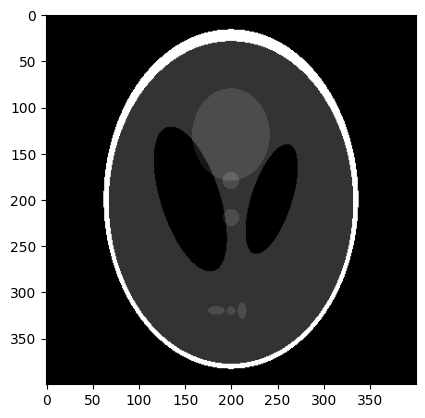

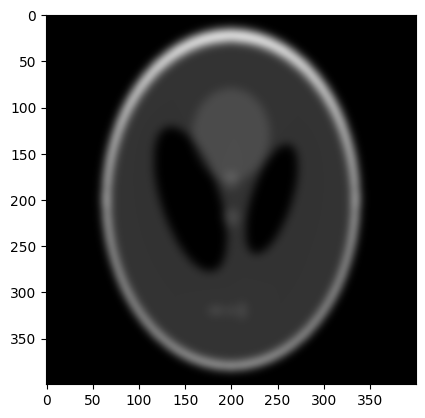

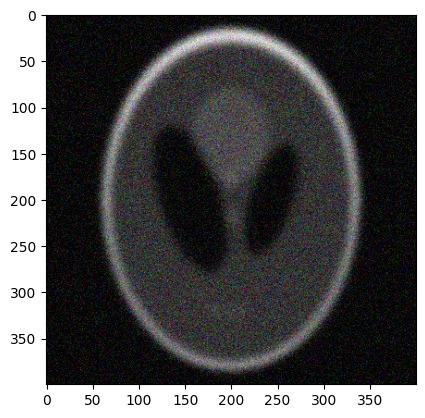

In [26]:
blur_img = tfa.image.gaussian_filter2d(img, filter_shape = (400, 400), sigma = 5)
plt.imshow(img)
plt.show()
plt.imshow(blur_img)
plt.show()
noisy_img = blur_img + 0.1*torch.randn(img_dim)
plt.imshow(noisy_img)
plt.show()

## Create Model

In [27]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

 load net keys <built-in method keys of collections.OrderedDict object at 0x7e66adeb6740>


# Inference and Show results

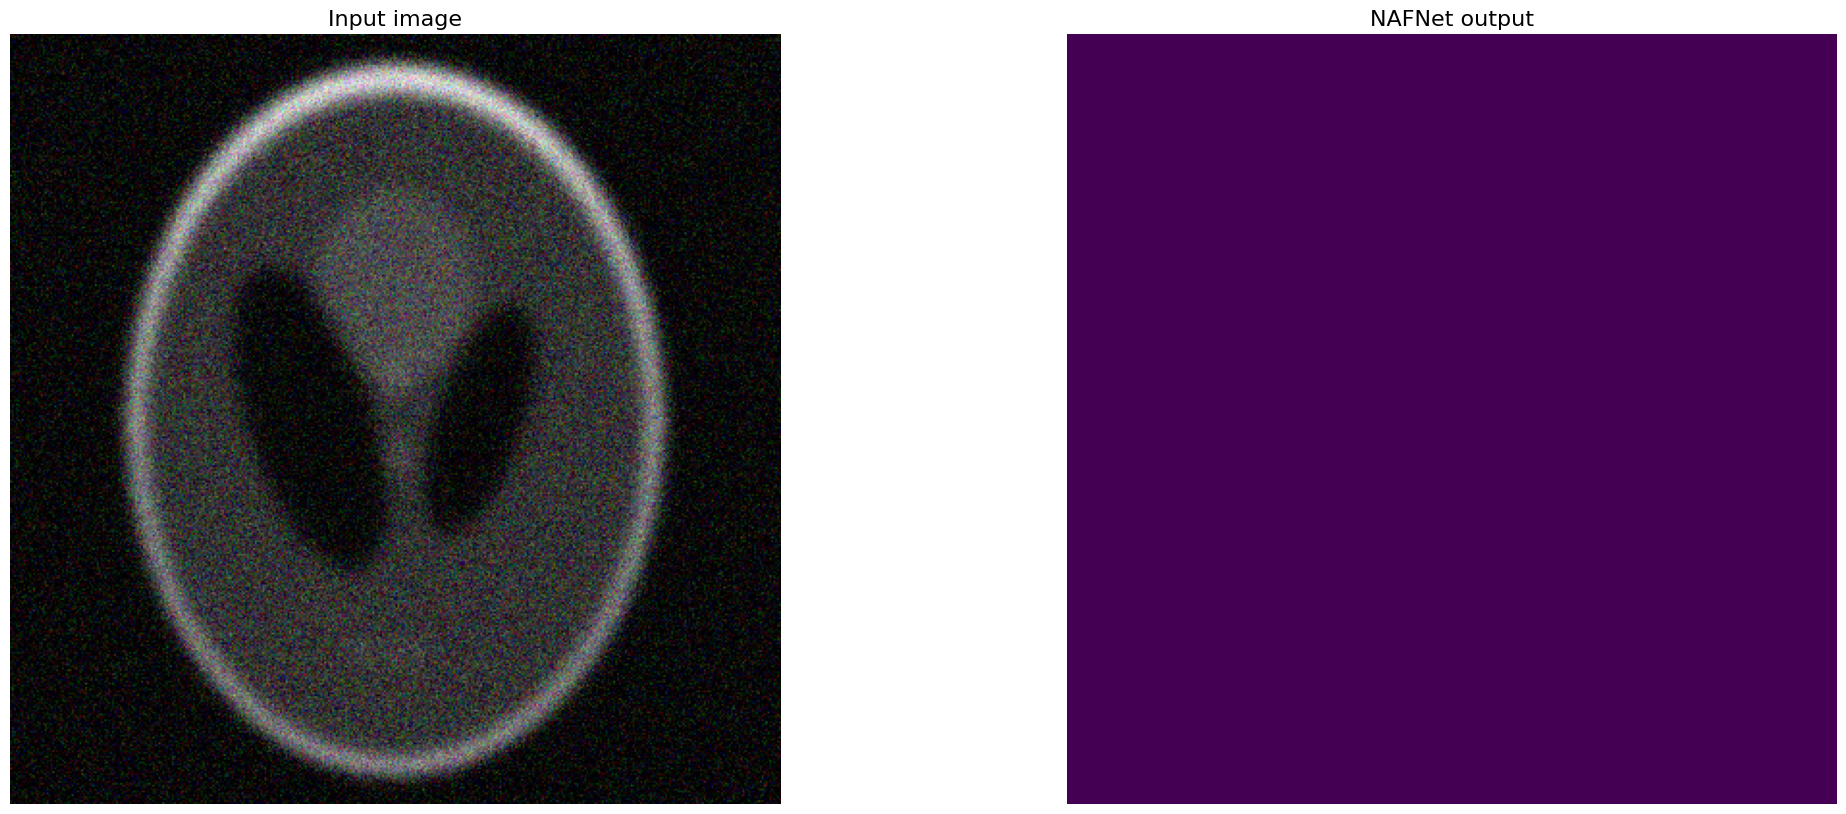

In [28]:
import cv2 as cv
output_path = '/output/06-12-2022_L1210_H2B-GFP_AmineRed_02_R3D_D3D-1.jpg'

img_input = noisy_img.numpy()
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = (cv.resize(cv.cvtColor(cv.imread(output_path),cv.COLOR_BGR2GRAY),(256,256)))
display(img_input, img_output)

In [30]:
img_input = (cv.resize(cv.cvtColor(cv.imread("/content/HEK_nonFPS_MNP_cell_body0026.png"),cv.COLOR_BGR2GRAY),(256,256)))
np.mean((img_input - img_output)**2)/255


0.0407565247778799

In [22]:
import torch
inp = torch.from_numpy(img_input)
outp = torch.from_numpy(img_output)

In [23]:
loss = torch.nn.MSELoss()
mse_tik = loss(inp,outp)
print(mse_tik.item())

RuntimeError: ignored

In [24]:
output_path = 'demo_output/noisy-demo-1.png'

img_input = blur_noisy_img.numpy()
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = (cv.resize(cv.cvtColor(cv.imread(output_path),cv.COLOR_BGR2GRAY),(256,256)))
display(img_input, img_output)

NameError: ignored

# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload/input'
result_folder = 'upload/output'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.makedirs(upload_folder)
os.makedirs(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

## Inference

In [ ]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

## 3. Visualize (Optional)

In [ ]:
# visualize
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")